## Imports

In [9]:
import matplotlib.pyplot as plt
from numba import jit
import numpy as np
import random, math, pylab

## Funções

In [42]:
@jit(nopython=True)
def estado_inicial(N):
    s = np.zeros(N,dtype=np.int8)
    for i in range(N):
        s[i] = np.sign(2*np.random.random()-1)
    return s

@jit(nopython=True)
def vizinhos(L,N):
    viz = np.zeros((N,4),dtype=np.int16)
    for k in range(N):
        viz[k,0]=k+1
        if (k+1) % L == 0: viz[k,0] = k+1-L
        viz[k,1] = k+L 
        if k > (N-L-1): viz[k,1] = k+L-N
        viz[k,2] = k-1 
        if k % L == 0: viz[k,2] = k+L-1
        viz[k,3] = k-L 
        if k < L: viz[k,3] = k+N-L
    return viz

@jit(nopython=True)
def energia(s, viz, N):
    ener = 0 
    for i in range(N):
        h = s[viz[i,0]]+s[viz[i,1]]
        ener -= s[i]*h
    ener = int((ener+2*N)/4)
    return ener

@jit(nopython=True)
def mcstep(beta,s,viz,ener,mag):
    N=len(s)
    ex = np.zeros(5,dtype=np.float32)
    ex[0] = np.exp(8.0*beta)
    ex[1] = np.exp(4.0*beta)
    ex[2] = 0.0
    ex[3] = np.exp(-4.0*beta)
    ex[4] = np.exp(-8.0*beta)

    for i in range(N):
        h = s[viz[i,0]]+s[viz[i,1]]+s[viz[i,2]]+s[viz[i,3]]
        de = int(s[i]*h*0.5+2)
        if (np.random.random() < ex[de]):
            ener=ener+2*s[i]*h
            mag -= 2*s[i]
            s[i]=-s[i]
    return ener,mag,s

@jit(nopython=True)
def cv_result(x, x_2, t):
    beta = 1/t
    n = 10**6
    result =  (beta*(x_2 - (x**2)))/n
    return result*beta

@jit(nopython=True)
def suscep_result(x, x_2, t):
    beta = 1/t
    n = 10**6
    result =  (beta*(x_2 - (x**2)))/n
    return result

@jit(nopython=True)
def erro_estatistico(x):
    n = 90
    soma = 0
    mean = np.array(x).mean()
    for i in range(len(x)):
        soma += (mean - x[i])**2
    return (soma/n)**(1/2)

# Simulações

In [45]:
t = np.linspace(5,1,17) #separação do tempo em .25, começando do 5

steps = int((1.1)*(10**6))
desconsiderar = 10**5

[5.   4.75 4.5  4.25 4.   3.75 3.5  3.25 3.   2.75 2.5  2.25 2.   1.75
 1.5  1.25 1.  ]


## L = 18

In [44]:
L = 18
N = L**2
s = estado_inicial(n)

cv_result_18 = []
cv_erro_18 = []
suscep_result_18 = []
suscep_erro_18 = []
ener_result_18 = []
ener_erro_18 = []
mag_result_18 = []
mag_erro_18 = []

for i in t:
    viz = vizinhos(l,n)
    ener = energia(s, viz, n)
    beta = 1/i
    mag = s.sum()
    
    ener_v = np.zeros(steps-desconsiderar)
    mag_v = np.zeros(steps-desconsiderar)
    
    for i in range(steps):
        ener,mag,s = mcstep(beta,s,viz,ener,mag)
        if (i >= desconsiderar):
            ener_v[i-desconsiderar] = ener
            mag_v[i-desconsiderar] = mag

    ener_v_quadrado = np.zeros(len(mag_v))
    mag_v_quadrado = np.zeros(len(mag_v))
    for j in range(len(mag_v)):
        ener_v_quadrado[j] = ener_v[j]**2
        mag_v_quadrado[j] = mag_v[j]**2
        
    cv = []
    suscep = []
    ener_spin = []
    mag = []


    for j in range(len(ener_v)):
        if ((j%(10**5))==0):
            pos_final = j + (10**5)+1
            
            vet_e = ener_v[j:pos_final]
            vet_e_quadrado = ener_v_quadrado[j:pos_final]
            media_e = np.array(vet_e).mean()
            
            vet_mag = mag_v[j:pos_final]
            vet_mag_quadrado = mag_v_quadrado[j:pos_final]
            media_mag = np.array(vet_mag).mean()
            
            result_cv = cv_result(media_e, np.array(vet_e_quadrado).mean(), i)

            result_suscep = suscep_result(media_mag, np.array(vet_mag_quadrado).mean(), i)
        
        ener_spin.append(media_e/n)
        mag.append(media_mag)
        cv.append(result_cv)
        suscep.append(result_suscep)

    ener_result_18.append(np.array(ener_spin).mean())
    ener_erro_18.append(erro_estatistico(ener_spin))

    mag_result_18.append(np.array(mag).mean())
    mag_erro_18.append(erro_estatistico(mag))

    cv_result_18.append(np.array(cv).mean())
    cv_erro_18.append(erro_estatistico(cv))

    suscep_result_18.append(np.array(suscep).mean())
    suscep_erro_18.append(erro_estatistico(suscep))

/usr/local/lib/python3.7/dist-packages/numba/core/ir_utils.py:2031: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'x' of function 'erro_estatistico'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "<ipython-input-42-e91271b8e6fa>", line 65:
@jit(nopython=True)
def erro_estatistico(x):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


## Gráficos

### Energia

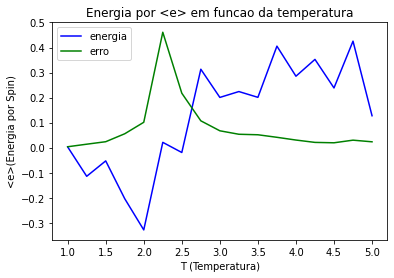

In [17]:
plt.plot(t, ener_result_18, label = 'energia', color='blue')
plt.plot(t, ener_erro_18, label = 'erro', color='green')
plt.title('Energia por <e> em funcao da temperatura')
plt.xlabel('T (Temperatura)')
plt.ylabel('<e>(Energia por Spin)')
plt.legend()
plt.show()

### Mag

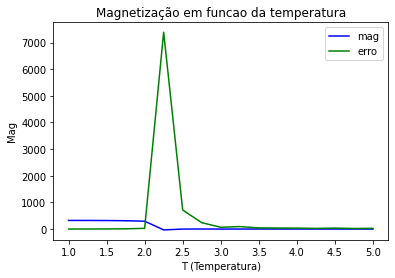

In [32]:
plt.plot(t, mag_result_18, label = 'mag', color='blue')
plt.plot(t, mag_erro_18, label = 'erro', color='green')
plt.title('Magnetização em funcao da temperatura')
plt.xlabel('T (Temperatura)')
plt.ylabel('Mag')
plt.legend()
plt.show()

### Cv

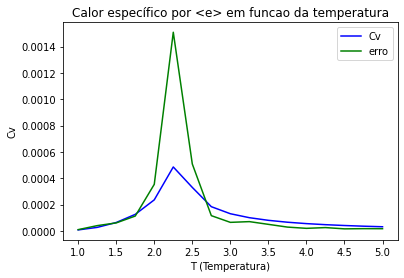

In [37]:
plt.plot(t, cv_result_18, label = 'Cv', color='blue')
plt.plot(t, cv_erro_18, label = 'erro', color='green')
plt.title('Calor específico por <e> em funcao da temperatura')
plt.xlabel('T (Temperatura)')
plt.ylabel('Cv')
plt.legend()
plt.show()

### Susceptibilidade mag

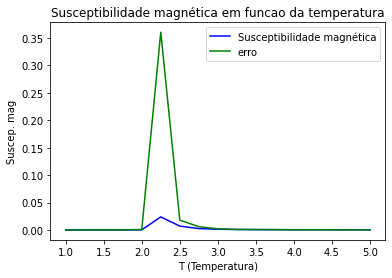

In [38]:
plt.plot(t, suscep_result_18, label = 'Susceptibilidade magnética', color='blue')
plt.plot(t, suscep_erro_18, label = 'erro', color='green')
plt.title('Susceptibilidade magnética em funcao da temperatura')
plt.xlabel('T (Temperatura)')
plt.ylabel('Suscep. mag')
plt.legend()
plt.show()

## L = 24

In [14]:
L = 24
N = L**2
s = estado_inicial(n)

cv_result_24 = []
cv_erro_24 = []
suscep_result_24 = []
suscep_erro_24 = []
ener_result_24 = []
ener_erro_24 = []
mag_result_24 = []
mag_erro_24 = []
for i in t:
    viz = vizinhos(l,n)
    ener = energia(s, viz, n)
    beta = 1/t
    mag = s.sum()
    
    ener_v = np.zeros(steps-desconsiderar)
    mag_v = np.zeros(steps-desconsiderar)
    
    for i in range(steps):
        ener,mag,s = mcstep(beta,s,viz,ener,mag)
        if (i >= desconsiderar):
            ener_v[i-desconsiderar] = ener
            mag_v[i-desconsiderar] = mag

    ener_v_quadrado = np.zeros(len(mag_v))
    mag_v_quadrado = np.zeros(len(mag_v))
    for j in range(len(mag_v)):
        ener_v_quadrado[j] = ener_v[j]**2
        mag_v_quadrado[j] = mag_v[j]**2
        
    cv = []
    suscep = []
    ener_spin = []
    mag = []


    for j in range(len(ener_v)):
        if ((j%(10**5))==0):
            pos_final = j + (10**5)+1
            
            vet_e = ener_v[j:pos_final]
            vet_e_quadrado = ener_v_quadrado[j:pos_final]
            media_e = np.array(vet_e).mean()
            
            vet_mag = mag_v[j:pos_final]
            vet_mag_quadrado = mag_v_quadrado[j:pos_final]
            media_mag = np.array(vet_mag).mean()
            
            result_cv = cv_result(media_e, np.array(vet_e_quadrado).mean(), id)

            result_suscep = suscep_result(media_mag, np.array(vet_mag_quadrado).mean(), i)
        
        ener_spin.append(media_e/n)
        mag.append(media_mag)
        cv.append(result_cv)
        suscep.append(result_suscep)

    ener_result_24.append(np.array(ener_spin).mean())
    ener_erro_24.append(erro_estatistico(ener_spin))

    mag_result_24.append(np.array(mag).mean())
    mag_erro_24.append(erro_estatistico(mag))

    cv_result_24.append(np.array(cv).mean())
    cv_erro_24.append(erro_estatistico(cv))

    suscep_result_24.append(np.array(suscep).mean())
    suscep_erro_24.append(erro_estatistico(suscep))

## Gráficos

### Energia

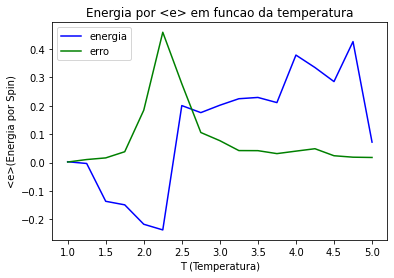

In [31]:
plt.plot(t, ener_result_24, label = 'energia', color='blue')
plt.plot(t, ener_erro_24, label = 'erro', color='green')
plt.title('Energia por <e> em funcao da temperatura')
plt.xlabel('T (Temperatura)')
plt.ylabel('<e>(Energia por Spin)')
plt.legend()
plt.show()

### Magnetização

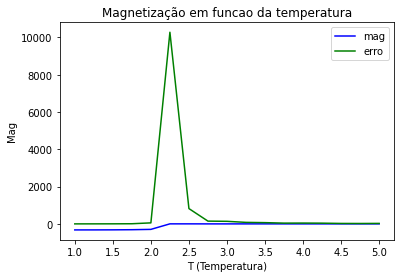

In [33]:
plt.plot(t, mag_result_24, label = 'mag', color='blue')
plt.plot(t, mag_erro_24, label = 'erro', color='green')
plt.title('Magnetização em funcao da temperatura')
plt.xlabel('T (Temperatura)')
plt.ylabel('Mag')
plt.legend()
plt.show()

### Cv

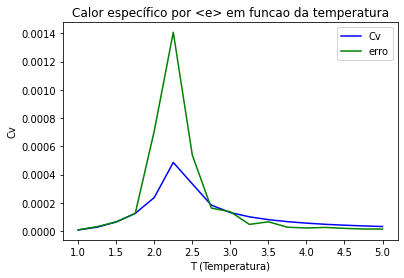

In [36]:
plt.plot(t, cv_result_24, label = 'Cv', color='blue')
plt.plot(t, cv_erro_24, label = 'erro', color='green')
plt.title('Calor específico por <e> em funcao da temperatura')
plt.xlabel('T (Temperatura)')
plt.ylabel('Cv')
plt.legend()
plt.show()

### Susceptibilidade mag

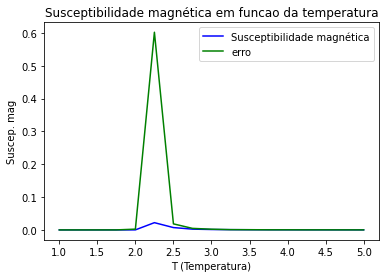

In [39]:
plt.plot(t, suscep_result_24, label = 'Susceptibilidade magnética', color='blue')
plt.plot(t, suscep_erro_24, label = 'erro', color='green')
plt.title('Susceptibilidade magnética em funcao da temperatura')
plt.xlabel('T (Temperatura)')
plt.ylabel('Suscep. mag')
plt.legend()
plt.show()

## L = 36

In [15]:
L = 36
N = L**2
s = estado_inicial(N)

cv_result_36 = []
cv_erro_36 = []
suscep_result_36 = []
suscep_erro_36 = []
ener_result_36 = []
ener_erro_36 = []
mag_result_36 = []
mag_erro_36 = []
for i in t:
    viz = vizinhos(L,N)
    ener = energia(s, viz, N)
    beta = 1/t
    mag = s.sum()
    
    ener_v = np.zeros(steps-desconsiderar)
    mag_v = np.zeros(steps-desconsiderar)
    
    for i in range(steps):
        ener,mag,s = mcstep(beta,s,viz,ener,mag)
        if (i >= desconsiderar):
            ener_v[i-desconsiderar] = ener
            mag_v[i-desconsiderar] = mag

    ener_v_quadrado = np.zeros(len(mag_v))
    mag_v_quadrado = np.zeros(len(mag_v))
    for j in range(len(mag_v)):
        ener_v_quadrado[j] = ener_v[j]**2
        mag_v_quadrado[j] = mag_v[j]**2
    
    cv = []
    suscep = []
    ener_spin = []
    mag = []


    for j in range(len(ener_v)):
        if ((j%(10**5))==0):
            pos_final = j + (10**5)+1
            
            vet_e = ener_v[j:pos_final]
            vet_e_quadrado = ener_v_quadrado[j:pos_final]
            media_e = np.array(vet_e).mean()
            
            vet_mag = mag_v[j:pos_final]
            vet_mag_quadrado = mag_v_quadrado[j:pos_final]
            media_mag = np.array(vet_mag).mean()
            
            result_cv = cv_result(media_e, np.array(vet_e_quadrado).mean(), i)

            result_suscep = suscep_result(media_mag, np.array(vet_mag_quadrado).mean(), i)
        
        ener_spin.append(media_e/N)
        mag.append(media_mag)
        cv.append(result_cv)
        suscep.append(result_suscep)

    ener_result_36.append(np.array(ener_spin).mean())
    ener_erro_36.append(erro_estatistico(ener_spin))

    mag_result_36.append(np.array(mag).mean())
    mag_erro_36.append(erro_estatistico(mag))

    cv_result_36.append(np.array(cv).mean())
    cv_erro_36.append(erro_estatistico(cv))

    suscep_result_36.append(np.array(suscep).mean())
    suscep_erro_36.append(erro_estatistico(suscep))

## Gráficos

### Energia

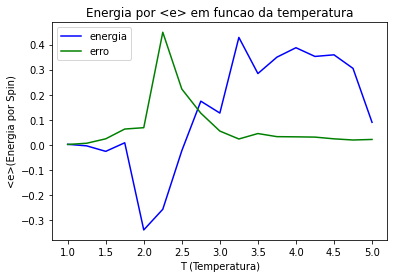

In [24]:
plt.plot(t, ener_result_36, label = 'energia', color='blue')
plt.plot(t, ener_erro_36, label = 'erro', color='green')
plt.title('Energia por <e> em funcao da temperatura')
plt.xlabel('T (Temperatura)')
plt.ylabel('<e>(Energia por Spin)')
plt.legend()
plt.show()

### Mag

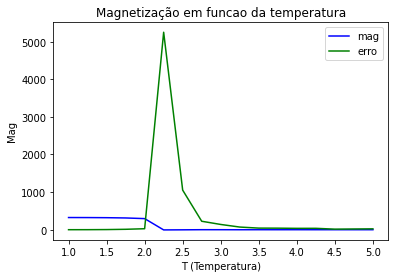

In [34]:
plt.plot(t, mag_result_36, label = 'mag', color='blue')
plt.plot(t, mag_erro_36, label = 'erro', color='green')
plt.title('Magnetização em funcao da temperatura')
plt.xlabel('T (Temperatura)')
plt.ylabel('Mag')
plt.legend()
plt.show()

### Cv

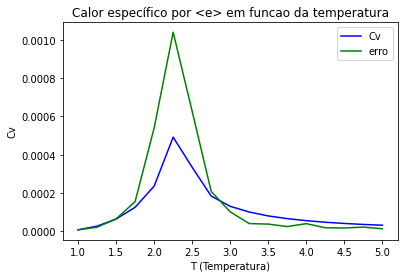

In [35]:
plt.plot(t, cv_result_36, label = 'Cv', color='blue')
plt.plot(t, cv_erro_36, label = 'erro', color='green')
plt.title('Calor específico por <e> em funcao da temperatura')
plt.xlabel('T (Temperatura)')
plt.ylabel('Cv')
plt.legend()
plt.show()

### Susceptibilidade mag

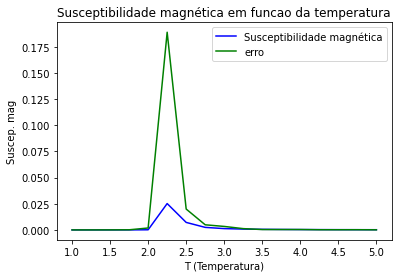

In [40]:
plt.plot(t, suscep_result_36, label = 'Susceptibilidade magnética', color='blue')
plt.plot(t, suscep_erro_36, label = 'erro', color='green')
plt.title('Susceptibilidade magnética em funcao da temperatura')
plt.xlabel('T (Temperatura)')
plt.ylabel('Suscep. mag')
plt.legend()
plt.show()

## Observações

Observando todas as grandezas, imagino que a tendência é que para um sistema de tamanho infinito em algum momento as grandezas vão se estabilizar em torno de um valor médio.

De modo geral, é perceptível que sempre que uma grandeza desvia de sua média é onde o erro mais aumenta e, observando os padrões, é visível que os erros são maiores com a tempareratura variando entre 2 e 3.